In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
train_data=pd.read_csv("train_data.csv")
test_data=pd.read_csv("test_data.csv")
df=pd.read_csv("combined_dataset.csv")

In [3]:
train_data.drop(["Unnamed: 0","ID"],axis=1,inplace=True)
test_data.drop(["Unnamed: 0","ID"],axis=1,inplace=True)

In [4]:
train_data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance_km,Time_Orderd_in_minutes,Time_Order_picked_in_minutes,Time_Differece_in_minutes
0,38.0,4.7,22.312790,73.170283,22.332790,73.190283,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Urban,14,3.029513,500.0,515.0,15.0
1,21.0,4.9,26.902908,75.792934,26.942908,75.832934,Cloudy,High,0,Meal,motorcycle,0.0,No,Metropolitian,28,5.959019,820.0,830.0,10.0
2,29.0,4.8,11.016298,76.972076,11.026298,76.982076,Sunny,Low,1,Meal,motorcycle,0.0,No,Urban,16,1.558099,620.0,625.0,5.0
3,22.0,4.8,26.910262,75.783013,26.920262,75.793013,Fog,High,2,Snack,scooter,0.0,No,Metropolitian,30,1.489800,700.0,710.0,10.0
4,20.0,4.7,12.933284,77.615428,12.993284,77.675428,Stormy,Medium,0,Buffet,motorcycle,0.0,No,Metropolitian,17,9.315745,1135.0,1150.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28946,38.0,4.5,15.544419,73.755736,15.634419,73.845736,Sunny,Medium,1,Drinks,scooter,0.0,No,Urban,16,13.894916,47.5,1145.0,1097.5
28947,33.0,4.6,19.875337,75.316722,19.915337,75.356722,Sandstorms,Medium,2,Buffet,electric_scooter,1.0,No,Urban,33,6.105310,925.0,940.0,15.0
28948,38.0,4.9,0.000000,0.000000,0.090000,0.090000,Cloudy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,28,14.152801,60.0,0.0,-60.0
28949,37.0,4.7,23.359407,85.325055,23.439407,85.405055,Windy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20,12.074047,1365.0,57.5,-1307.5


In [5]:
cat_cols=[col for col in train_data.columns if train_data[col].dtype=='object']
num_cols=[col for col in train_data.drop("Time_taken (min)",axis=1).columns if train_data[col].dtype in ['int64','float64']]

In [6]:
cat_cols

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [7]:
num_cols

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Distance_km',
 'Time_Orderd_in_minutes',
 'Time_Order_picked_in_minutes',
 'Time_Differece_in_minutes']

<Axes: >

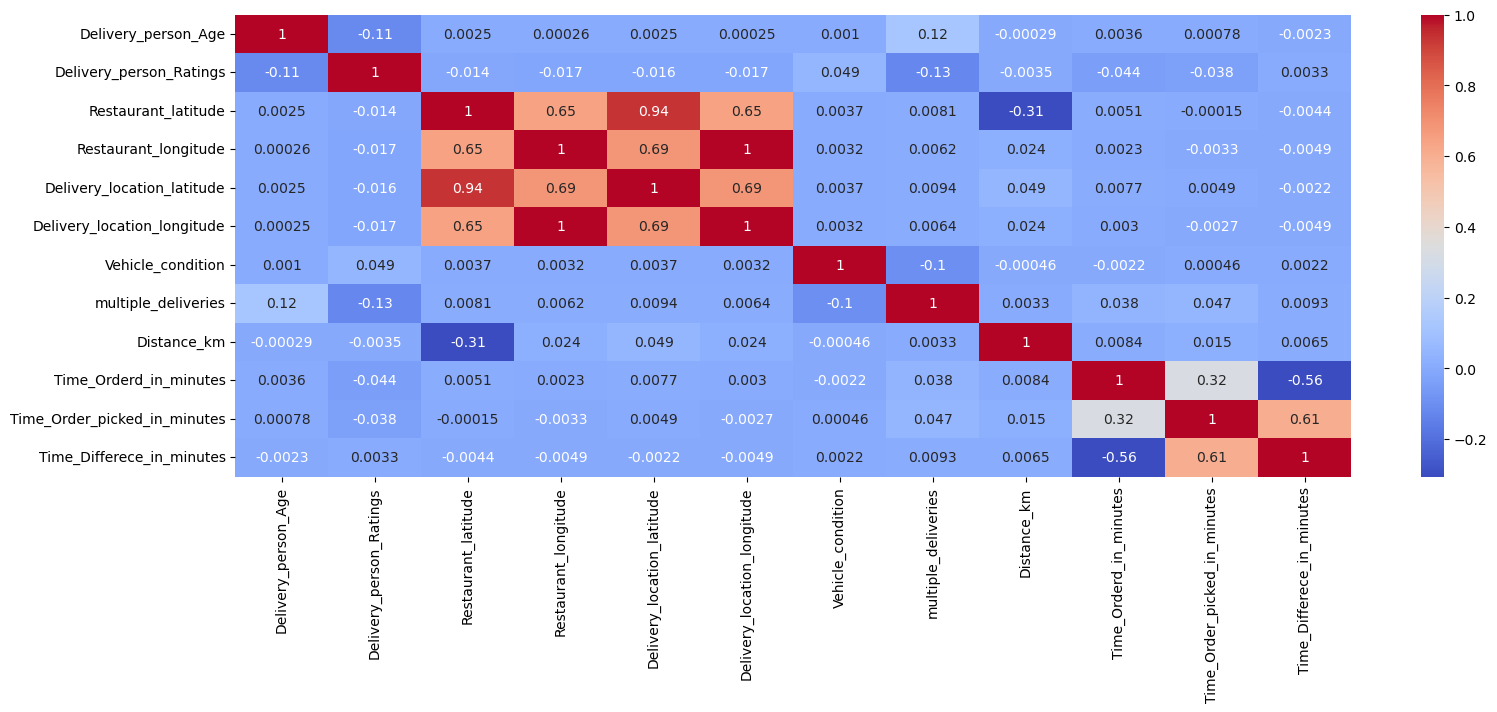

In [8]:
plt.figure(figsize=(18,6))
sns.heatmap(train_data[num_cols].corr(),annot=True,cmap="coolwarm",robust=True)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

df = sm.add_constant(train_data[num_cols])
calculate_vif(df).sort_values(by='VIF',ascending=False)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
10,Time_Orderd_in_minutes,inf
11,Time_Order_picked_in_minutes,inf
12,Time_Differece_in_minutes,inf
6,Delivery_location_longitude,3.858493e+07
4,Restaurant_longitude,3.857878e+07
3,Restaurant_latitude,3.631273e+07
5,Delivery_location_latitude,3.297543e+07
9,Distance_km,4.523463e+06
0,const,3.034993e+02
8,multiple_deliveries,1.051606e+00


##### -Removing the time_ordered_in_minutes,time_order_picked_in_minutes colums to prevent from data leakage
##### -Removing the high correlated features like restaurent_latitude,restaurent_longitude etc., columns by drawing insights froms heatmap and variance inflation factor


In [10]:
train_data.drop(["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude","Time_Order_picked_in_minutes", "Time_Orderd_in_minutes"],axis=1,inplace=True)
test_data.drop(["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude","Time_Order_picked_in_minutes","Time_Orderd_in_minutes"],axis=1,inplace=True)

In [11]:
cat_cols=[col for col in train_data.columns if train_data[col].dtype=='object']
num_cols=[col for col in train_data.drop("Time_taken (min)",axis=1).columns if train_data[col].dtype in ['int64','float64']]

#### Removing the outliers by using zscore method

In [12]:
from scipy.stats import zscore

# Apply Z-score for each numerical column
train_data_z = train_data[num_cols].apply(zscore)

# Identify outliers where the absolute value of the Z-score is greater than 3
outliers_z = (train_data_z.abs() > 3).any(axis=1)

# Remove the outliers by filtering out rows that have True in the outlier series
train_data_no_outliers = train_data[~outliers_z]

# Display the DataFrame after removing outliers
print(train_data_no_outliers)

       Delivery_person_Age  Delivery_person_Ratings Weather_conditions  \
0                     38.0                      4.7              Sunny   
1                     21.0                      4.9             Cloudy   
2                     29.0                      4.8              Sunny   
3                     22.0                      4.8                Fog   
4                     20.0                      4.7             Stormy   
...                    ...                      ...                ...   
28946                 38.0                      4.5              Sunny   
28947                 33.0                      4.6         Sandstorms   
28948                 38.0                      4.9             Cloudy   
28949                 37.0                      4.7              Windy   
28950                 28.0                      4.8              Windy   

      Road_traffic_density  Vehicle_condition Type_of_order   Type_of_vehicle  \
0                      Low    

In [13]:
train_data

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance_km,Time_Differece_in_minutes
0,38.0,4.7,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Urban,14,3.029513,15.0
1,21.0,4.9,Cloudy,High,0,Meal,motorcycle,0.0,No,Metropolitian,28,5.959019,10.0
2,29.0,4.8,Sunny,Low,1,Meal,motorcycle,0.0,No,Urban,16,1.558099,5.0
3,22.0,4.8,Fog,High,2,Snack,scooter,0.0,No,Metropolitian,30,1.489800,10.0
4,20.0,4.7,Stormy,Medium,0,Buffet,motorcycle,0.0,No,Metropolitian,17,9.315745,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28946,38.0,4.5,Sunny,Medium,1,Drinks,scooter,0.0,No,Urban,16,13.894916,1097.5
28947,33.0,4.6,Sandstorms,Medium,2,Buffet,electric_scooter,1.0,No,Urban,33,6.105310,15.0
28948,38.0,4.9,Cloudy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,28,14.152801,-60.0
28949,37.0,4.7,Windy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20,12.074047,-1307.5


In [14]:
train_data=pd.DataFrame(train_data_no_outliers)

In [15]:
train_data

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance_km,Time_Differece_in_minutes
0,38.0,4.7,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Urban,14,3.029513,15.0
1,21.0,4.9,Cloudy,High,0,Meal,motorcycle,0.0,No,Metropolitian,28,5.959019,10.0
2,29.0,4.8,Sunny,Low,1,Meal,motorcycle,0.0,No,Urban,16,1.558099,5.0
3,22.0,4.8,Fog,High,2,Snack,scooter,0.0,No,Metropolitian,30,1.489800,10.0
4,20.0,4.7,Stormy,Medium,0,Buffet,motorcycle,0.0,No,Metropolitian,17,9.315745,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28946,38.0,4.5,Sunny,Medium,1,Drinks,scooter,0.0,No,Urban,16,13.894916,1097.5
28947,33.0,4.6,Sandstorms,Medium,2,Buffet,electric_scooter,1.0,No,Urban,33,6.105310,15.0
28948,38.0,4.9,Cloudy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,28,14.152801,-60.0
28949,37.0,4.7,Windy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20,12.074047,-1307.5


In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

pipe1 = Pipeline(steps=[
    ('preprocesor', preprocessor),  # assuming imputer is already defined
    ('xgb', XGBRegressor(n_estimators=20, max_depth=9, verbosity=1))  # Use verbosity instead of verbose
])
pipe1

NameError: name 'num_cols' is not defined

In [ ]:
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RepeatedKFold,KFold,StratifiedKFold
from sklearn.metrics import mean_absolute_error,r2_score
import statsmodels.api as sm
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

X_train=train_data.drop("Time_taken (min)",axis=1)
y_train=train_data['Time_taken (min)']
X_test=test_data.drop("Time_taken (min)",axis=1)
y_test=test_data['Time_taken (min)']



In [18]:
rskf = RepeatedKFold(n_splits=3,random_state=42)
cv_results = cross_validate(pipe1, X_train,y_train, cv=rskf, scoring='r2',return_train_score=True)
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

Mean Train Score: 0.8893078617877728
Standard Deviation of Train Scores: 0.0023611100254297165
Mean Test Score: 0.822647722687327
Standard Deviation of Test Scores: 0.0027931366058023027


Mean absolute Error: 3.123769734845017
R-squared on holdout set: 0.8255254859358092
Adjusted R-squared on holdout set: 0.8253565715212251


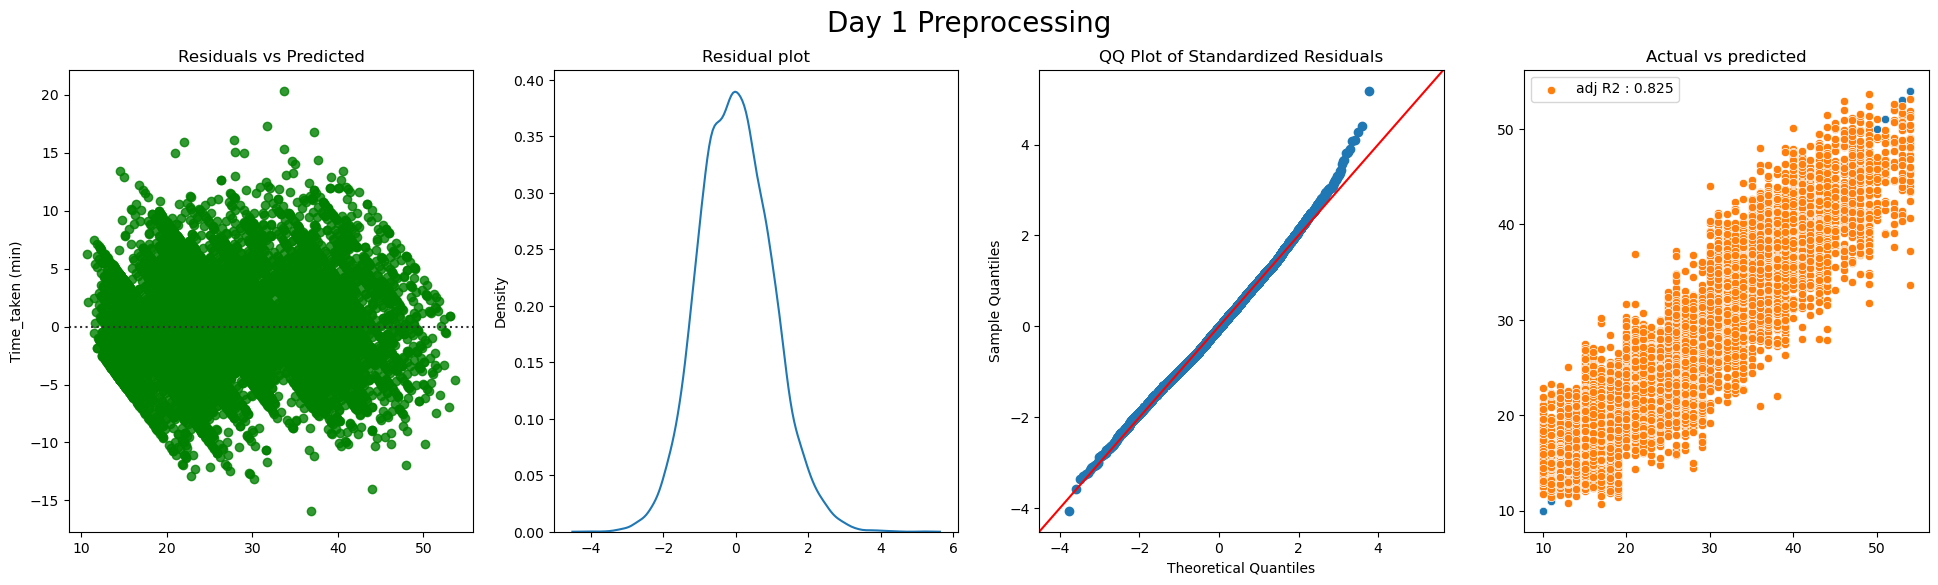

In [19]:
sc=StandardScaler()
predictions = cross_val_predict(pipe1, X_test, y_test)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
ax4.set_title("Actual vs predicted")
ax4.set_xlabel("")
ax4.set_ylabel("")
plt.suptitle("Day 1 Preprocessing",fontsize=20)
plt.show()

In [20]:
train_data.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'Distance_km', 'Time_Differece_in_minutes'],
      dtype='object')

# Hyperparameter Tuning

In [21]:
# pipe = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('xgb', XGBRegressor())
# ])

# # Define the parameter grid
# param_grid = {
#     'xgb__n_estimators': [100, 200, 300],
#     'xgb__learning_rate': [0.01, 0.05, 0.1],
#     'xgb__max_depth': [3, 5, 7],
#     'xgb__subsample': [0.8, 1.0],
#     'xgb__colsample_bytree': [0.6, 0.8, 1.0]
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(pipe, param_grid, cv=3, verbose=1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

In [22]:
pipe2= Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('xgb', XGBRegressor(
        n_estimators=200,       # Best value from grid search
        max_depth=7,            # Best value from grid search
        learning_rate=0.05,     # Best value from grid search
        subsample=1.0,          # Best value from grid search
        colsample_bytree=0.8,   # Best value from grid search
        verbosity=1             # Show training progress
    ))
])
pipe2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'Vehicle_condition',
                                                   'multiple_deliveries',
                                                   'Distance_km',
                                                   'Time_Differece_in_minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequen...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [23]:
rskf = RepeatedKFold(n_splits=10,random_state=42)
cv_results = cross_validate(pipe2, X_train,y_train, cv=rskf, scoring='r2',return_train_score=True)
print(f'Mean Train Score: {cv_results["train_score"].mean()}')
print(f'Standard Deviation of Train Scores: {cv_results["train_score"].std()}')
print(f'Mean Test Score: {cv_results["test_score"].mean()}')
print(f'Standard Deviation of Test Scores: {cv_results["test_score"].std()}')

Mean Train Score: 0.861413940967135
Standard Deviation of Train Scores: 0.0008610250162701197
Mean Test Score: 0.8305719293008235
Standard Deviation of Test Scores: 0.004812220643450938


Mean absolute Error: 3.065450382724568
R-squared on holdout set: 0.8342334779654274
Adjusted R-squared on holdout set: 0.8340729940392946


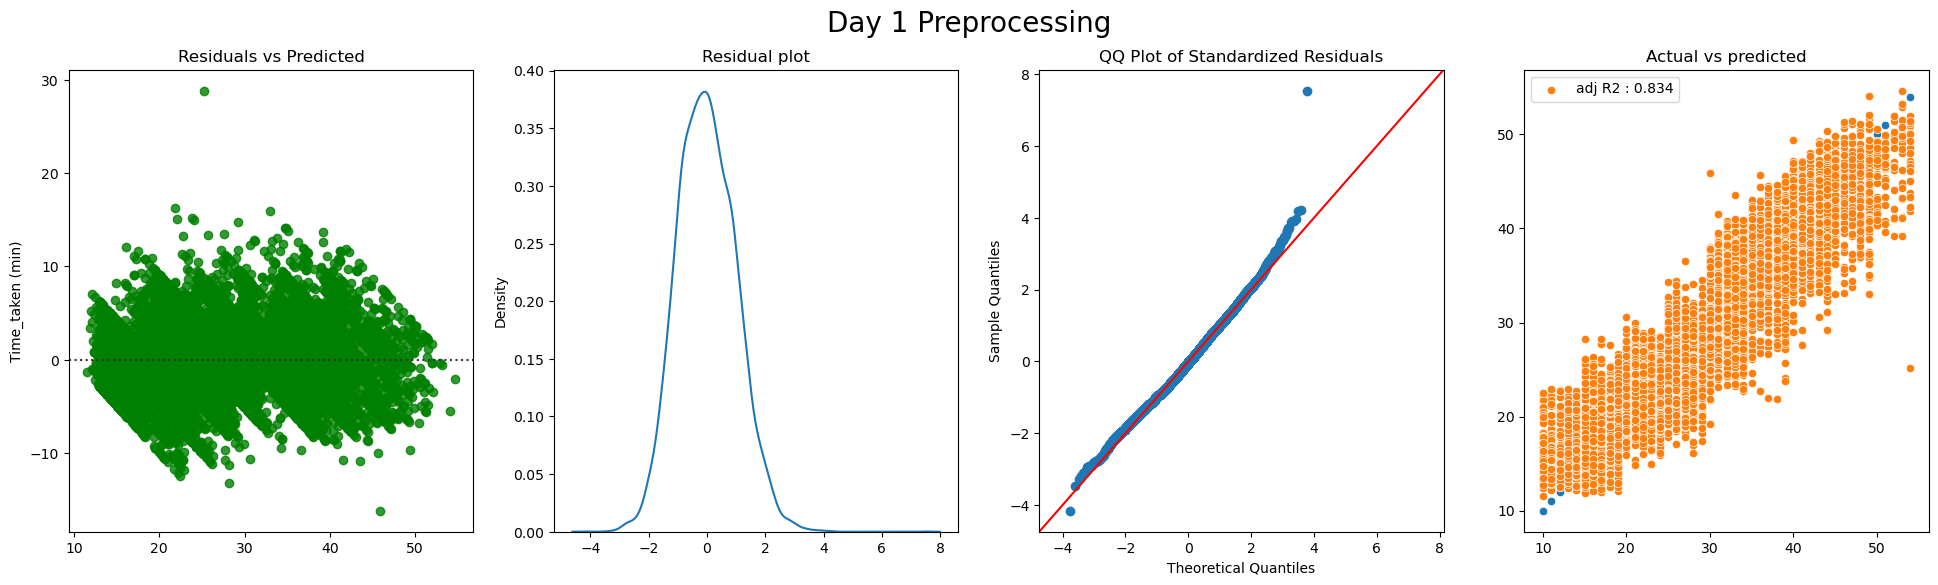

In [24]:
sc=StandardScaler()
predictions = cross_val_predict(pipe2, X_test, y_test)
residuals = y_test - predictions
std_residuals = sc.fit_transform(residuals.values.reshape(-1, 1))
std_residuals = std_residuals.flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_true=y_test,y_pred= predictions)
n,p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Mean absolute Error: {mae}')
print(f'R-squared on holdout set: {r2}')
print(f'Adjusted R-squared on holdout set: {adjusted_r2}')

fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols=4,figsize=(24,6))
sns.residplot(x=predictions, y=residuals, color='g',ax=ax1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')
sns.kdeplot(std_residuals,ax=ax2)
ax2.set_title("Residual plot")
# QQ plot
sm.qqplot(std_residuals, line='45', ax=ax3)
ax3.set_title('QQ Plot of Standardized Residuals')
sns.scatterplot(x=y_test,y=y_test,ax=ax4)
sns.scatterplot(x=y_test,y=predictions,ax=ax4,label=f"adj R2 : {adjusted_r2.round(3)}")
ax4.set_title("Actual vs predicted")
ax4.set_xlabel("")
ax4.set_ylabel("")
plt.suptitle("Day 1 Preprocessing",fontsize=20)
plt.show()

In [29]:
# train_data.to_csv("featureEng_train_data.csv")
# test_data.to_csv("featureEng_test_data.csv")

In [30]:
train_data

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance_km,Time_Differece_in_minutes
0,38.0,4.7,Sunny,Low,2,Drinks,electric_scooter,0.0,No,Urban,14,3.029513,15.0
1,21.0,4.9,Cloudy,High,0,Meal,motorcycle,0.0,No,Metropolitian,28,5.959019,10.0
2,29.0,4.8,Sunny,Low,1,Meal,motorcycle,0.0,No,Urban,16,1.558099,5.0
3,22.0,4.8,Fog,High,2,Snack,scooter,0.0,No,Metropolitian,30,1.489800,10.0
4,20.0,4.7,Stormy,Medium,0,Buffet,motorcycle,0.0,No,Metropolitian,17,9.315745,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28946,38.0,4.5,Sunny,Medium,1,Drinks,scooter,0.0,No,Urban,16,13.894916,1097.5
28947,33.0,4.6,Sandstorms,Medium,2,Buffet,electric_scooter,1.0,No,Urban,33,6.105310,15.0
28948,38.0,4.9,Cloudy,Low,2,Meal,motorcycle,0.0,No,Metropolitian,28,14.152801,-60.0
28949,37.0,4.7,Windy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,20,12.074047,-1307.5
